Dataset download

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kundanbedmutha/exam-score-prediction-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'exam-score-prediction-dataset' dataset.
Path to dataset files: /kaggle/input/exam-score-prediction-dataset


In [ ]:
path = '..' + path + '/Exam_Score_Prediction.csv'

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(pd.read_csv(path))
df

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19997,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19998,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19999,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,20000,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


In [ ]:
df.dtypes

,0
student_id,int64
age,int64
gender,object
course,object
study_hours,float64
class_attendance,float64
internet_access,object
sleep_hours,float64
sleep_quality,object
study_method,object


In [ ]:
category_col = []
numeric_col = []

id_col = 'student_id'
target_col = 'exam_score'

for col in df.columns :
  if col == 'student_id' or col == 'exam_score' :
    continue
  elif df[col].dtypes == 'object' :
    category_col.append(col)
  else:
    numeric_col.append(col)

print(category_col)
print(numeric_col)

['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']
['age', 'study_hours', 'class_attendance', 'sleep_hours']


In [ ]:
all_col = category_col + numeric_col
all_col

['gender',
 'course',
 'internet_access',
 'sleep_quality',
 'study_method',
 'facility_rating',
 'exam_difficulty',
 'age',
 'study_hours',
 'class_attendance',
 'sleep_hours']

In [ ]:
for col in category_col :
  print(df[col].value_counts(),'\n')

gender
other     6726
male      6695
female    6579
Name: count, dtype: int64 

course
bca        2902
ba         2896
b.sc       2878
b.com      2864
bba        2836
diploma    2826
b.tech     2798
Name: count, dtype: int64 

internet_access
yes    16988
no      3012
Name: count, dtype: int64 

sleep_quality
average    6694
poor       6687
good       6619
Name: count, dtype: int64 

study_method
self-study       4079
online videos    4069
coaching         4036
group study      3922
mixed            3894
Name: count, dtype: int64 

facility_rating
medium    6760
low       6638
high      6602
Name: count, dtype: int64 

exam_difficulty
moderate    9878
easy        6141
hard        3981
Name: count, dtype: int64 



## Visualisasi

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

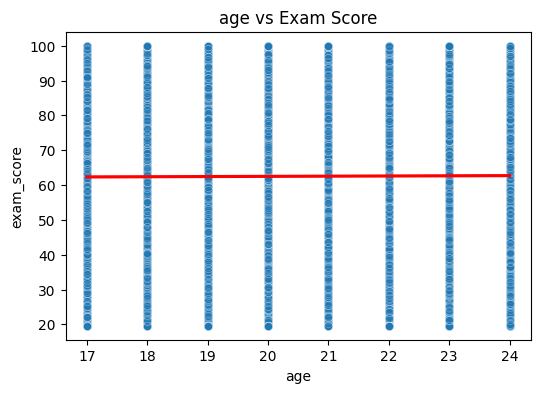

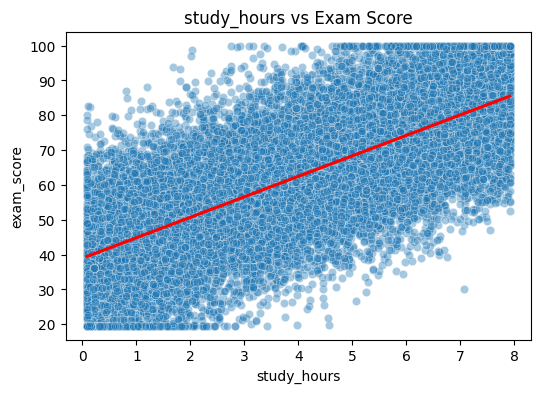

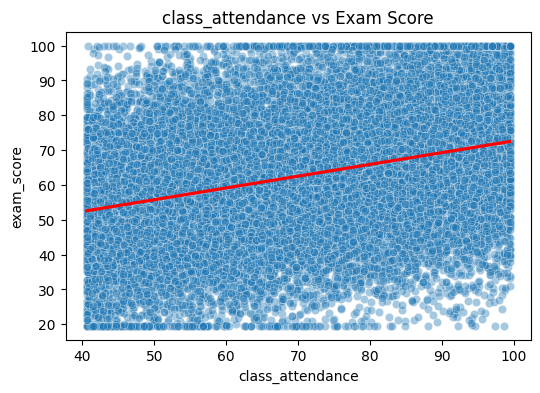

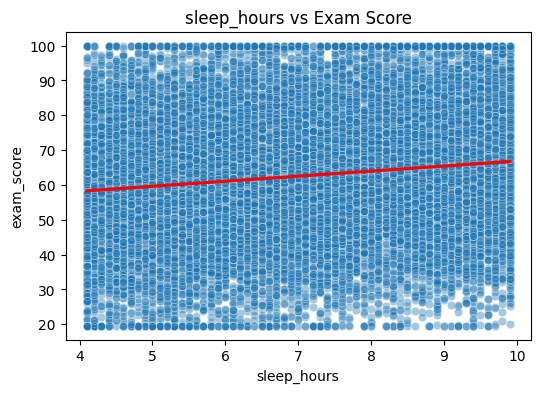

In [ ]:
for col in numeric_col:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=col, y="exam_score", alpha=0.4)
    sns.regplot(
        data=df,
        x=col,
        y="exam_score",
        scatter=False,
        color="red"
    )
    plt.title(f"{col} vs Exam Score")
    plt.show()


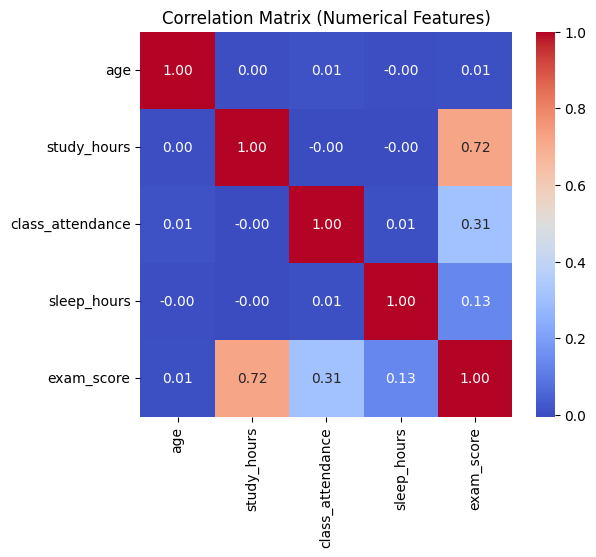

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(
    df[numeric_col + ["exam_score"]].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


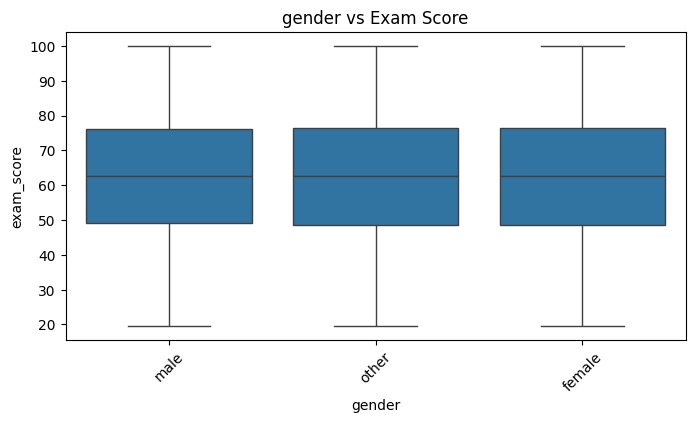

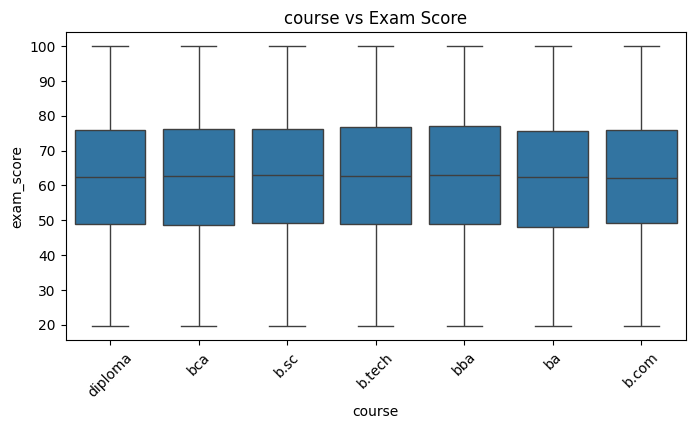

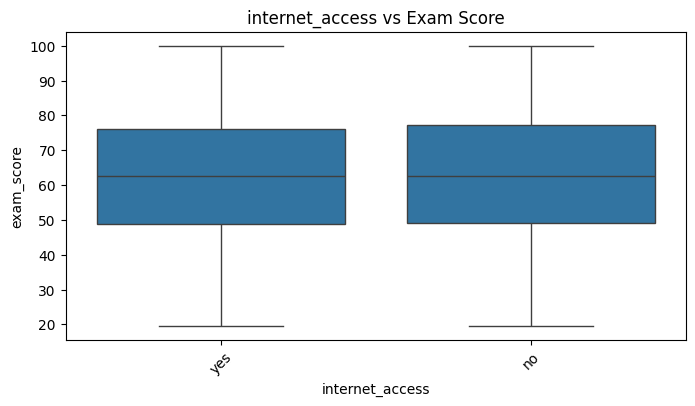

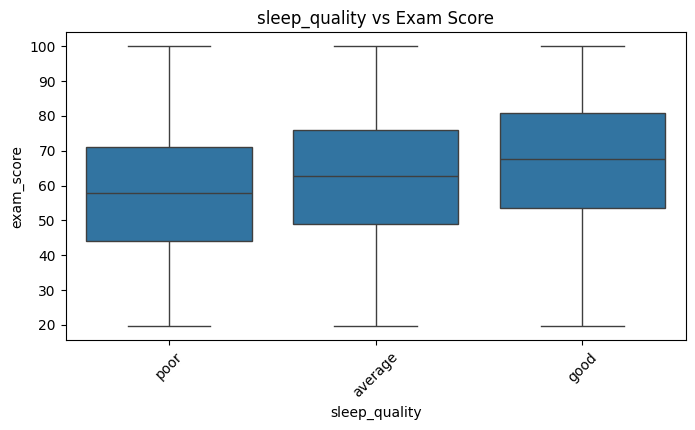

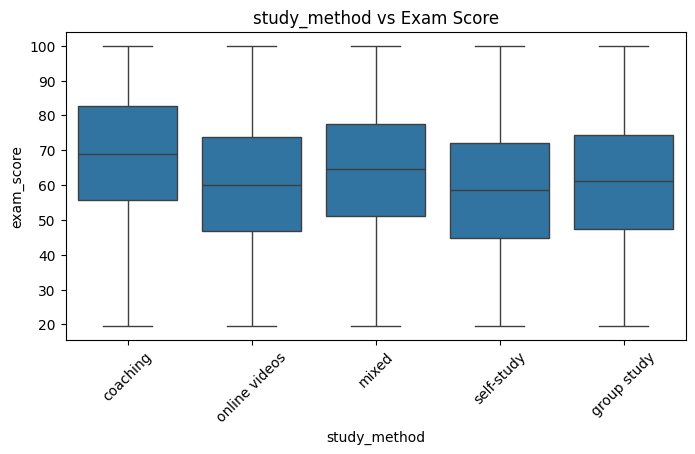

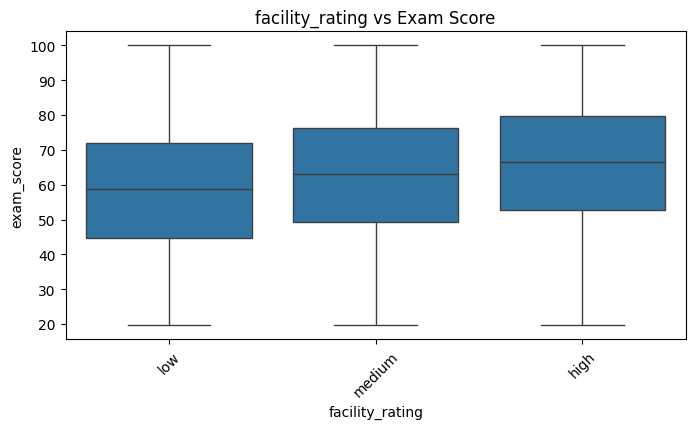

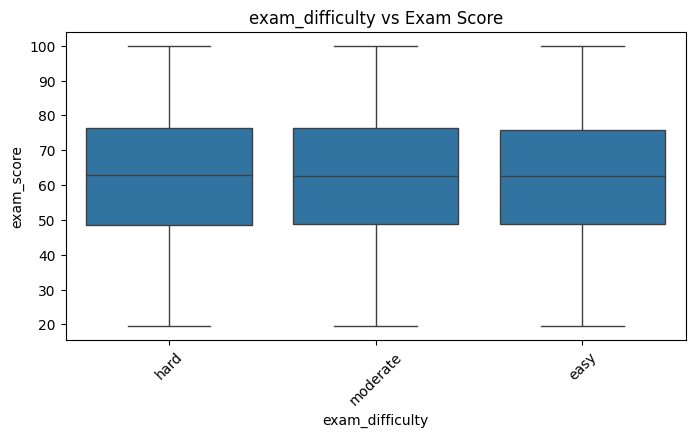

In [ ]:
for col in category_col:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x=col, y="exam_score")
    plt.title(f"{col} vs Exam Score")
    plt.xticks(rotation=45)
    plt.show()

## Feature Engineering

Encoding categorical

* gender -->	nominal -->	One-Hot
* course -->	nominal	--> One-Hot
* internet_access -->	binary -->	Binary
* study_method -->	nominal	--> One-Hot
* sleep_quality	--> ordinal -->	Ordinal
* facility_rating	--> ordinal -->	Ordinal
* exam_difficulty	--> ordinal -->	Ordinal

In [ ]:
# sleep quality
sleep_map = {
    "poor": 0,
    "average": 1,
    "good": 2
}

# facility rating
facility_map = {
    "low": 0,
    "medium": 1,
    "high": 2
}

# exam difficulty
difficulty_map = {
    "easy": 0,
    "moderate": 1,
    "hard": 2
}

# internet access
internet_access_map = {
    "no": 0,
    "yes": 1
}

# study method
study_method_map = {
    "self-study" : 1,
    "online videos": 2,
    "group study" : 3,
    "mixed" : 4,
    "coaching" : 5
}

In [ ]:
nominal_cols = [
    "gender",
    "course"
]

In [ ]:
def encode_ordinal(df) :
  df["sleep_quality"] = df["sleep_quality"].map(sleep_map)
  df["facility_rating"] = df["facility_rating"].map(facility_map)
  df["exam_difficulty"] = df["exam_difficulty"].map(difficulty_map)
  df['internet_access'] = df['internet_access'].map(internet_access_map)
  df['study_method'] = df['study_method'].map(study_method_map)

  return df

def encode_nominal(df, nominal_cols) :
  df = pd.get_dummies(
    df,
    columns=nominal_cols,
    drop_first=False
    )

  return df

In [ ]:
df_cor = df.copy()
df_cor = encode_ordinal(df_cor)
df_cor = encode_nominal(df_cor, nominal_cols)

df_cor

,student_id,age,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,...,gender_female,gender_male,gender_other,course_b.com,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,course_diploma
0,1,17,2.78,92.9,1,7.4,0,5,0,2,...,False,True,False,False,False,False,False,False,False,True
1,2,23,3.37,64.8,1,4.6,1,2,1,1,...,False,False,True,False,False,False,False,False,True,False
2,3,22,7.88,76.8,1,8.5,0,5,2,1,...,False,True,False,False,True,False,False,False,False,False
3,4,20,0.67,48.4,1,5.8,1,2,0,1,...,False,False,True,False,False,False,False,False,False,True
4,5,20,0.89,71.6,1,9.8,0,5,0,1,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19997,18,6.50,71.3,1,5.0,2,1,0,0,...,False,False,True,False,False,False,False,True,False,False
19996,19998,18,3.71,41.6,0,5.9,1,5,1,1,...,False,True,False,True,False,False,False,False,False,False
19997,19999,19,7.88,68.2,1,4.6,0,3,0,0,...,False,False,True,False,False,False,False,False,False,True
19998,20000,19,4.60,76.3,0,6.1,2,1,1,1,...,False,True,False,False,False,False,False,True,False,False


In [ ]:
df_cor.dtypes

,0
student_id,int64
age,int64
study_hours,float64
class_attendance,float64
internet_access,int64
sleep_hours,float64
sleep_quality,int64
study_method,int64
facility_rating,int64
exam_difficulty,int64


In [ ]:
def generate_correlation_matrix(df) :
  all_col = df.columns.tolist()
  all_col.remove('exam_score')
  all_col.remove('student_id')
  all_col

  corr_df = df[all_col + ["exam_score"]]

  corr_with_target = (
      corr_df
      .corr(method="pearson")["exam_score"]
      .drop("exam_score")
      .sort_values(ascending=False)
  )

  print(corr_with_target)

  plt.figure(figsize=(4,6))
  sns.heatmap(
      corr_with_target.to_frame(),
      annot=True,
      cmap="coolwarm",
      fmt=".5f"
  )
  plt.title("Correlation with Exam Score")
  plt.show()

study_hours         0.717788
class_attendance    0.308850
sleep_quality       0.198888
study_method        0.178470
facility_rating     0.162923
sleep_hours         0.133222
course_bba          0.008920
age                 0.006522
exam_difficulty     0.004749
course_b.sc         0.004462
course_b.tech       0.002993
gender_female       0.002552
gender_other        0.001799
course_bca          0.000236
course_b.com       -0.003892
course_diploma     -0.003917
gender_male        -0.004342
internet_access    -0.007826
course_ba          -0.008727
Name: exam_score, dtype: float64


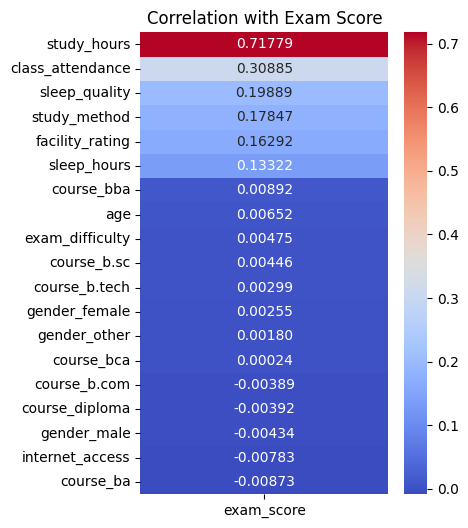

In [ ]:
generate_correlation_matrix(df_cor)

### Data for Model

remove
* age
* internet
* course
* gender
* exam difficulty


In [ ]:
df_model = df.copy()
df_model = df_model.drop(columns=['age', 'internet_access', 'course', 'gender', 'exam_difficulty'])
df_model

,student_id,study_hours,class_attendance,sleep_hours,sleep_quality,study_method,facility_rating,exam_score
0,1,2.78,92.9,7.4,poor,coaching,low,58.9
1,2,3.37,64.8,4.6,average,online videos,medium,54.8
2,3,7.88,76.8,8.5,poor,coaching,high,90.3
3,4,0.67,48.4,5.8,average,online videos,low,29.7
4,5,0.89,71.6,9.8,poor,coaching,low,43.7
...,...,...,...,...,...,...,...,...
19995,19997,6.50,71.3,5.0,good,self-study,low,86.5
19996,19998,3.71,41.6,5.9,average,coaching,medium,60.9
19997,19999,7.88,68.2,4.6,poor,group study,low,64.5
19998,20000,4.60,76.3,6.1,good,self-study,medium,79.0


In [ ]:
def encode_ordinal(df) :
  # sleep quality
  sleep_map = {
      "poor": 0,
      "average": 1,
      "good": 2
  }

  # facility rating
  facility_map = {
      "low": 0,
      "medium": 1,
      "high": 2
  }

  # exam difficulty
  difficulty_map = {
      "easy": 0,
      "moderate": 1,
      "hard": 2
  }

  # internet access
  internet_access_map = {
      "no": 0,
      "yes": 1
  }

  # study method
  study_method_map = {
      "self-study" : 1,
      "online videos": 2,
      "group study" : 3,
      "mixed" : 4,
      "coaching" : 5
  }

  df["sleep_quality"] = df["sleep_quality"].map(sleep_map)
  df["facility_rating"] = df["facility_rating"].map(facility_map)
  # df["exam_difficulty"] = df["exam_difficulty"].map(difficulty_map)
  # df['internet_access'] = df['internet_access'].map(internet_access_map)
  df['study_method'] = df['study_method'].map(study_method_map)

  return df

In [ ]:
df_model = encode_ordinal(df_model)
df_model

,student_id,study_hours,class_attendance,sleep_hours,sleep_quality,study_method,facility_rating,exam_score
0,1,2.78,92.9,7.4,0,5,0,58.9
1,2,3.37,64.8,4.6,1,2,1,54.8
2,3,7.88,76.8,8.5,0,5,2,90.3
3,4,0.67,48.4,5.8,1,2,0,29.7
4,5,0.89,71.6,9.8,0,5,0,43.7
...,...,...,...,...,...,...,...,...
19995,19997,6.50,71.3,5.0,2,1,0,86.5
19996,19998,3.71,41.6,5.9,1,5,1,60.9
19997,19999,7.88,68.2,4.6,0,3,0,64.5
19998,20000,4.60,76.3,6.1,2,1,1,79.0


In [ ]:
df_model

,student_id,study_hours,class_attendance,sleep_hours,sleep_quality,study_method,facility_rating,exam_score
0,1,2.78,92.9,7.4,0,5,0,58.9
1,2,3.37,64.8,4.6,1,2,1,54.8
2,3,7.88,76.8,8.5,0,5,2,90.3
3,4,0.67,48.4,5.8,1,2,0,29.7
4,5,0.89,71.6,9.8,0,5,0,43.7
...,...,...,...,...,...,...,...,...
19995,19997,6.50,71.3,5.0,2,1,0,86.5
19996,19998,3.71,41.6,5.9,1,5,1,60.9
19997,19999,7.88,68.2,4.6,0,3,0,64.5
19998,20000,4.60,76.3,6.1,2,1,1,79.0


study_hours         0.717788
class_attendance    0.308850
sleep_quality       0.198888
study_method        0.178470
facility_rating     0.162923
sleep_hours         0.133222
Name: exam_score, dtype: float64


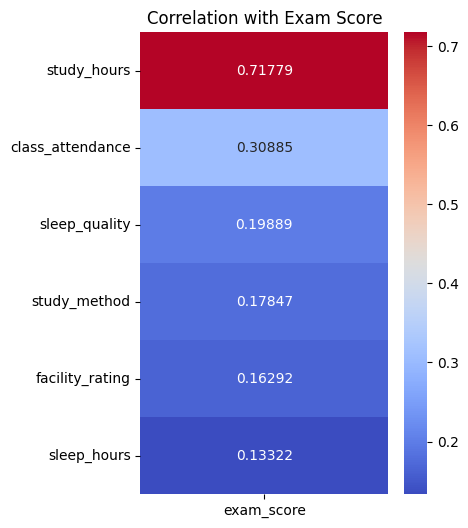

In [ ]:
generate_correlation_matrix(df_model)

In [ ]:
df_model.dtypes

,0
student_id,int64
study_hours,float64
class_attendance,float64
sleep_hours,float64
sleep_quality,int64
study_method,int64
facility_rating,int64
exam_score,float64


scaling exam score / 100

In [ ]:
df_model['exam_score'] = df_model['exam_score'] / 100
df_model

,student_id,study_hours,class_attendance,sleep_hours,sleep_quality,study_method,facility_rating,exam_score
0,1,2.78,92.9,7.4,0,5,0,0.589
1,2,3.37,64.8,4.6,1,2,1,0.548
2,3,7.88,76.8,8.5,0,5,2,0.903
3,4,0.67,48.4,5.8,1,2,0,0.297
4,5,0.89,71.6,9.8,0,5,0,0.437
...,...,...,...,...,...,...,...,...
19995,19997,6.50,71.3,5.0,2,1,0,0.865
19996,19998,3.71,41.6,5.9,1,5,1,0.609
19997,19999,7.88,68.2,4.6,0,3,0,0.645
19998,20000,4.60,76.3,6.1,2,1,1,0.790


## Modelling

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X = df_model.drop(columns=['student_id', 'exam_score'])
y = df_model['exam_score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [ ]:
def evaluate_regression(y_true, y_pred, eps=1e-8):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    mape = np.mean(
        np.abs((y_true - y_pred) / (y_true + eps))
    ) * 100

    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R^2: {r2:.2f} \n")

    return mae, rmse, r2, mape

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mae_lr, rmse_lr, r2_lr, mape_lr = evaluate_regression(y_test, y_pred_lr)

MAE: 7.89
RMSE: 9.82
MAPE: 14.74%
R^2: 0.73 



In [ ]:
max_lr = float(y_pred_lr.max())

In [ ]:
def normalize_roof(y) :
  return y / max_lr * 100

In [ ]:
res = list(map(normalize_roof,y_pred_lr))
res

In [ ]:
mae_lr, rmse_lr, r2_lr, mape_lr = evaluate_regression(y_test, res)

MAE: 9.23
RMSE: 11.34
MAPE: 15.46%
R^2: 0.64 



In [ ]:
def forced_normalize(y) :
  return np.float64(100) if y > 100 else y

In [ ]:
res_forced = list(map(forced_normalize,y_pred_lr))
res_forced

In [ ]:
mae_lr, rmse_lr, r2_lr, mape_lr = evaluate_regression(y_test, res_forced)

MAE: 7.88
RMSE: 9.82
MAPE: 14.72%
R^2: 0.73 



In [ ]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf, rmse_rf, r2_rf, mape_rf = evaluate_regression(y_test, y_pred_rf)

MAE: 0.08
RMSE: 0.10
MAPE: 15.66%
R^2: 0.70 



In [ ]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lr, mae_rf],
    "RMSE": [rmse_lr, rmse_rf],
    "R²": [r2_lr, r2_rf],
    "MAPE" : [mape_lr, mape_rf]
})

results

,Model,MAE,RMSE,R²,MAPE
0,Linear Regression,7.893598,9.824561,0.730157,14.735984
1,Random Forest,8.367850,10.412897,0.696871,15.659107


## Distribution Visualization

In [ ]:
df

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19997,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19998,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19999,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,20000,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


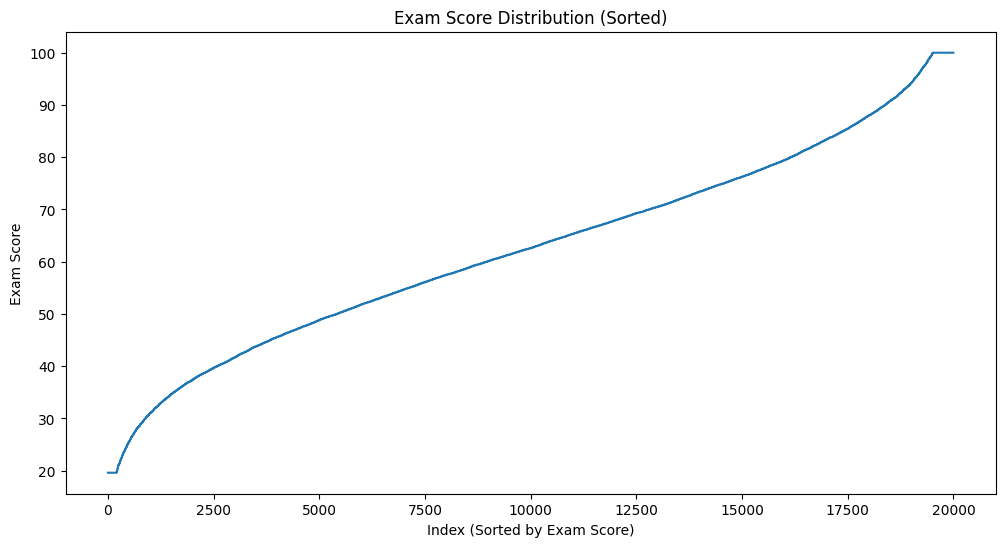

In [ ]:
plt.figure(figsize=(12, 6))
df_sorted = df.sort_values(by="exam_score").reset_index()
sns.lineplot(data=df_sorted, x=df_sorted.index, y="exam_score")
plt.title("Exam Score Distribution (Sorted)")
plt.xlabel("Index (Sorted by Exam Score)")
plt.ylabel("Exam Score")
plt.show()

In [ ]:
df['exam_score'].describe()

,exam_score
count,20000.000000
mean,62.513225
std,18.908491
min,19.599000
25%,48.800000
50%,62.600000
75%,76.300000
max,100.000000


In [ ]:
bins = range(0, 101, 10)
labels = [f'{i}-{i+9}' for i in bins[:-1]]
df['exam_score_range'] = pd.cut(df['exam_score'], bins=bins, labels=labels, right=False)

score_distribution = df['exam_score_range'].value_counts().sort_index()
display(score_distribution.to_frame())

,count
exam_score_range,
0-9,0
10-19,217
20-29,667
30-39,1691
40-49,2829
50-59,3549
60-69,3830
70-79,3355
80-89,2240


/tmp/ipython-input-2820254710.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_distribution.index, y=score_distribution.values, palette='viridis')


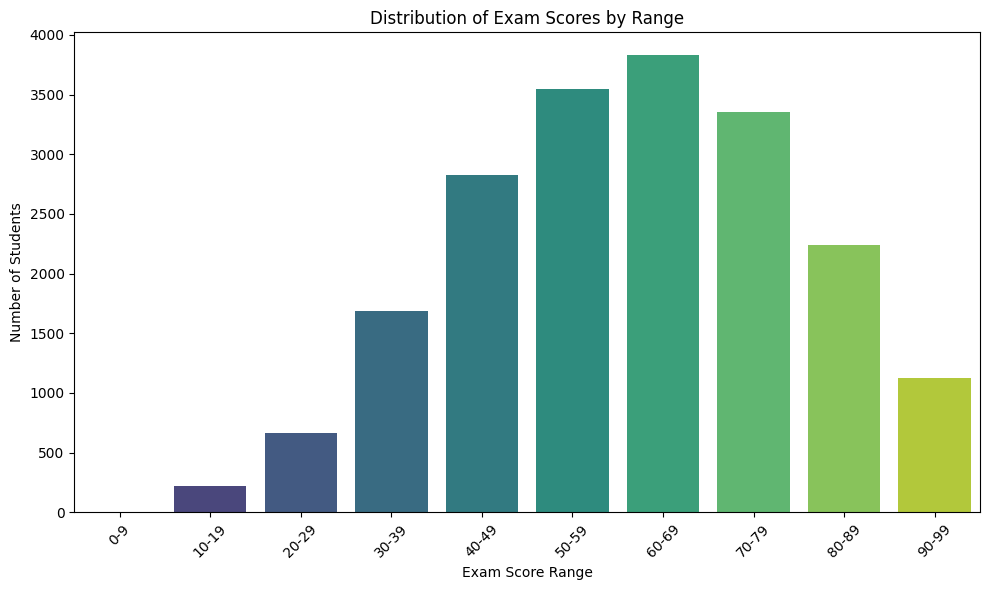

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=score_distribution.index, y=score_distribution.values, palette='viridis')
plt.title('Distribution of Exam Scores by Range')
plt.xlabel('Exam Score Range')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Prediction Testing

In [ ]:
X_test.columns

Index(['study_hours', 'class_attendance', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating'],
      dtype='object')

In [ ]:
new_student = {
    "study_hours": 6,
    "class_attendance": 80,
    "sleep_hours": 7,
    "sleep_quality": "good",
    "study_method": "self-study",
    "facility_rating": "high"
}

In [ ]:
ordinal_maps = {
    "sleep_quality": {
        "poor": 0,
        "average": 1,
        "good": 2
    },
    "facility_rating": {
        "low": 0,
        "medium": 1,
        "high": 2
    },
    "study_method" : {
      "self-study" : 1,
      "online videos": 2,
      "group study" : 3,
      "mixed" : 4,
      "coaching" : 5
  }
}

In [ ]:
new_df = pd.DataFrame([new_student])

In [ ]:
for col, mapping in ordinal_maps.items():
    new_df[col] = new_df[col].map(mapping)

In [ ]:
new_df

,study_hours,class_attendance,sleep_hours,sleep_quality,study_method,facility_rating
0,6,80,7,2,1,2


In [ ]:
pred_lr = lr.predict(new_df)
print(f"Predicted Exam Score: {pred_lr[0]:.2f}")
pred_rf = rf.predict(new_df)
print(f"Predicted Exam Score: {pred_rf[0]:.2f}")

Predicted Exam Score: 81.65
Predicted Exam Score: 83.94


In [ ]:
new_df = new_df.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
pred_lr = lr.predict(new_df)
print(f"Predicted Exam Score (LR): {pred_lr[0]:.2f}")
pred_rf = rf.predict(new_df)
print(f"Predicted Exam Score (RF): {pred_rf[0]:.2f}")

Predicted Exam Score (LR): 81.65
Predicted Exam Score (RF): 83.94


In [ ]:
def predict_exam_score(input_dict, model):
    df = pd.DataFrame([input_dict])

    ordinal_maps = {
        "sleep_quality": {
            "poor": 0,
            "average": 1,
            "good": 2
        },
        "facility_rating": {
            "low": 0,
            "medium": 1,
            "high": 2
        },
        "study_method" : {
          "self-study" : 1,
          "online videos": 2,
          "group study" : 3,
          "mixed" : 4,
          "coaching" : 5
      }
    }

    for col, mapping in ordinal_maps.items():
        df[col] = df[col].map(mapping)

    df = df.reindex(columns=X_train.columns, fill_value=0)

    return model.predict(df)[0]

In [ ]:
new_student_1 = {
    "study_hours": 200,
    "class_attendance": 100,
    "sleep_hours": 1,
    "sleep_quality": "poor",
    "study_method": "self-study",
    "facility_rating": "high"
}

print(predict_exam_score(new_student_1, lr))
print(predict_exam_score(new_student_1, rf))

1210.8052268896402
83.28600000000002


In [ ]:
import joblib

joblib.dump(lr, "model_LR.pkl")
joblib.dump(X_train.columns.tolist(), "artifacts_train_columns.pkl")

['artifacts_train_columns.pkl']